# ДЗ 3.

# Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.



In [1]:
import numpy as np
import pandas as pd
from math import factorial


In [2]:
df = pd.DataFrame({'salary':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]}, columns = ['salary'])

In [3]:
salary_mean = df['salary'].sum() / df['salary'].count()
print(f' Cреднее арифметическое = {salary_mean}')

 Cреднее арифметическое = 65.3


In [8]:
df['salary'].mean()

65.3

In [9]:
salary_std = np.sqrt(((df['salary'] - df['salary'].mean())**2).sum() / df['salary'].count())
print(f' Cреднее квадратичное отклонение = {salary_std}')

 Cреднее квадратичное отклонение = 30.823854398825596


In [10]:
df['salary'].std(ddof=0)

30.823854398825596

In [11]:
salary_variance = ((df['salary'] - df['salary'].mean())**2).sum() / df['salary'].count()
print(f' Оценка дисперсии смещенная = {salary_variance}')

 Оценка дисперсии смещенная = 950.11


In [12]:
salary_variance2 = ((df['salary'] - df['salary'].mean())**2).sum() / (df['salary'].count() - 1)
print(f' Оценка дисперсии несмещенная = {salary_variance2}')

 Оценка дисперсии несмещенная = 1000.1157894736842


In [13]:
df['salary'].var(ddof=0)

950.11

In [14]:
df['salary'].var(ddof=1)

1000.1157894736842

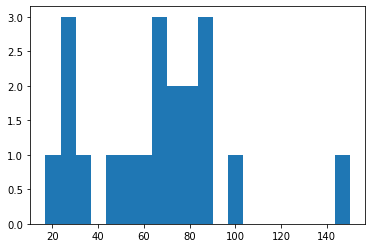

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['salary'], bins = 20)
plt.show()

# Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.


In [16]:
df['salary'].quantile([0.25, 0.75])


0.25    42.0
0.75    81.0
Name: salary, dtype: float64

In [17]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1
print(f' Интерквартильное расстояние = {iqr}')

 Интерквартильное расстояние = 39.0


In [18]:
import seaborn as sns

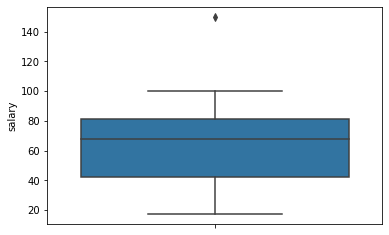

In [19]:
sns.boxplot(df['salary'], orient='v')
plt.show()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений роста оказалось за пределами «усов».

In [20]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [21]:
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]
outliers

,salary
19,150


In [22]:
v = outliers.loc[19, 'salary']
print(f' Количество выбросов {outliers.shape[0]}')
print(f' Выброс равен: {v}')

 Количество выбросов 1
 Выброс равен: 150


In [23]:
d = outliers.shape[0] / df.shape[0]
print(f' Доля выбросов равна {d}')

 Доля выбросов равна 0.05



# Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?



In [24]:
p_a = 0.8
p_b = 0.7
p_c = 0.9
# так как на факультет С поступило в 2 раза больше студентов, то 
n_a = 1/4
n_b = 1/4
n_c = 1/2
n = n_a * p_a + n_b * p_b + n_c * p_c

In [25]:
Pa = n_a * p_a / n
Pb = n_b * p_b / n
Pc = n_c * p_c / n
print(f'Вероятность, что студент учится на факультете А равна {Pa}')
print(f'Вероятность, что студент учится на факультете B равна {Pb}')
print(f'Вероятность, что студент учится на факультете C равна {Pc}')

Вероятность, что студент учится на факультете А равна 0.24242424242424246
Вероятность, что студент учится на факультете B равна 0.21212121212121213
Вероятность, что студент учится на факультете C равна 0.5454545454545455
